In [8]:
import torch
device = torch.device
device
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
print(train_data)


9913344it [00:01, 6934267.12it/s]                             


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



29696it [00:00, 14904158.38it/s]         

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



1649664it [00:00, 9414366.63it/s]                              


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



5120it [00:00, 5128931.57it/s]          

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [9]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [10]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [11]:
print(train_data.targets.size())

torch.Size([60000])


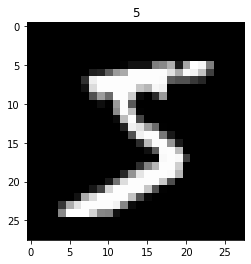

In [14]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

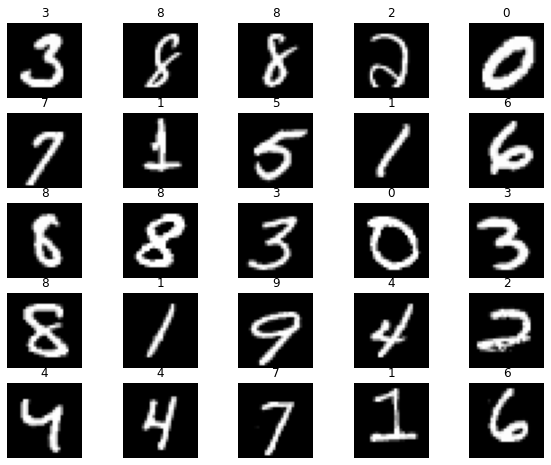

In [19]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [20]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
    batch_size=100, shuffle=True, num_workers=1),
    'test': torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x25e57d90c10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x25e57d905e0>}

In [27]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.convl = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self,x):
        x = self.convl(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x
cnn = CNN()
print (cnn)


CNN(
  (convl): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [28]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [30]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [47]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0] 
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1530
Epoch [1/10], Step [200/600], Loss: 0.2056
Epoch [1/10], Step [300/600], Loss: 0.0810
Epoch [1/10], Step [400/600], Loss: 0.1495
Epoch [1/10], Step [500/600], Loss: 0.0271
Epoch [1/10], Step [600/600], Loss: 0.0540
Epoch [2/10], Step [100/600], Loss: 0.0843
Epoch [2/10], Step [200/600], Loss: 0.0529
Epoch [2/10], Step [300/600], Loss: 0.0308
Epoch [2/10], Step [400/600], Loss: 0.0342
Epoch [2/10], Step [500/600], Loss: 0.0444
Epoch [2/10], Step [600/600], Loss: 0.0774
Epoch [3/10], Step [100/600], Loss: 0.0303
Epoch [3/10], Step [200/600], Loss: 0.0378
Epoch [3/10], Step [300/600], Loss: 0.0618
Epoch [3/10], Step [400/600], Loss: 0.0358
Epoch [3/10], Step [500/600], Loss: 0.1234
Epoch [3/10], Step [600/600], Loss: 0.0399
Epoch [4/10], Step [100/600], Loss: 0.0498
Epoch [4/10], Step [200/600], Loss: 0.0439
Epoch [4/10], Step [300/600], Loss: 0.0336
Epoch [4/10], Step [400/600], Loss: 0.0253
Epoch [4/10], Step [500/600], Loss: 0.0426
Epoch [4/10

In [49]:
def test():
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1) [1].data.squeeze()
            accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
            pass
        print ('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
        pass
test()

Test Accuracy of the model on the 10000 test images: 0.97


In [51]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:10].numpy()
actual_number

array([5, 2, 3, 6, 4, 3, 7, 0, 3, 0], dtype=int64)

In [58]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.min(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print (f'Actual number: {actual_number}')

Prediction number: [0 5 4 7 0 0 6 3 4 5]
Actual number: [5 2 3 6 4 3 7 0 3 0]
